In [243]:
from pylab import *
import random

# Grid generation following "SimpleGridTurbulence" module from CRPropa

In [244]:
index = 5/3
alpha = -index -2
Brms = 5

In [245]:
n = 100
n2 = int(floor(n / 2) + 1)

Bkx = np.zeros((n * n * n2),dtype=np.complex_)
Bky = np.zeros((n * n * n2),dtype=np.complex_)
Bkz = np.zeros((n * n * n2),dtype=np.complex_)
k0 = np.zeros((n * n * n2))

random.seed(42)

# N_grids possible discrete wave numbers
K = [0] * n
for i in range(0,n):
    K[i] = i / n - i / (n / 2.)

# Min and max k values
k_min = 10. / 1000.
k_max = 10. / 50.

n0 = np.array((1,1,1))

# Computing Bkx, Bky and Bkz at each point of the grid
for ix in range(0,n):
    for iy in range(0,n):
        for iz in range(0,n2):
            i = ix * n * n2 + iy * n2 + iz
            ek = np.array((K[ix], K[iy], K[iz]))
            k = np.sqrt(K[ix]**2 + K[iy]**2 + K[iz]**2)
            k0[i] = k
            if k > k_max or k < k_min:
                Bkx[i] = 0;
                Bky[i] = 0;
                Bkz[i] = 0;
                continue
            if K[ix] == K[iy] == K[iz]:
                e1 = np.array((-1., 1., 0))
                e2 = np.array((1., 1., -2.))
            else:
                e1 = np.cross(ek, n0)
                e2 = np.cross(ek, e1)
            e1 = e1 / np.sqrt(e1[0]**2 + e1[1]**2 + e1[2]**2)
            e2 = e2 / np.sqrt(e2[0]**2 + e2[1]**2 + e2[2]**2)
            theta = 2 * np.pi * np.random.rand()
            b = e1 * np.cos(theta) + e2 * np.sin(theta)
            b = b * np.random.normal() * pow(k, alpha / 2)
            phase = 2 * np.pi * np.random.rand()
            cosPhase = np.cos(phase)
            sinPhase = np.sin(phase)
            Bkx[i] = (b[0] * cosPhase) + (b[0] * sinPhase)*1j
            Bky[i] = (b[1] * cosPhase) + (b[1] * sinPhase)*1j
            Bkz[i] = (b[2] * cosPhase) + (b[2] * sinPhase)*1j

In [246]:
# Inverse FFT to go to x-space
Bk = np.array((Bkx, Bky, Bkz))
B = np.fft.ifftn(Bk)
Bx = B[0]
By = B[1]
Bz = B[2]

## Plotting B(k) components

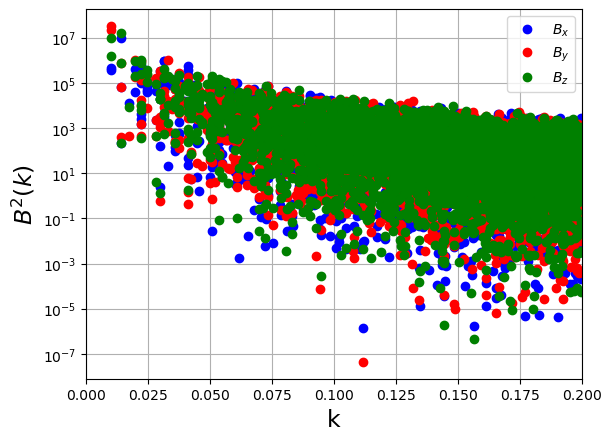

In [247]:
plt.plot(k0, Bkx.real**2 + Bkx.imag**2, 'o', color='blue', label=r'$B_x$')
plt.plot(k0, Bky.real**2 + Bky.imag**2, 'o', color='red', label=r'$B_y$')
plt.plot(k0, Bkz.real**2 + Bkz.imag**2, 'o', color='green', label=r'$B_z$')
plt.yscale('log')
plt.xlim(0,0.2)
plt.xlabel('k', fontsize=17)
plt.ylabel(r'$B^2(k)$', fontsize=17)
plt.grid()
plt.legend()

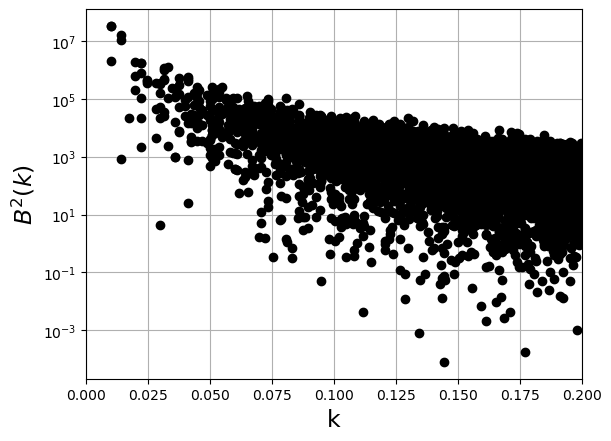

In [248]:
Bk_total = np.sqrt((Bkx.real**2 + Bkx.imag**2) + (Bky.real**2 + Bky.imag**2) + (Bkz.real**2 + Bkz.imag**2))
plt.plot(k0, Bk_total**2, 'o', color='black')
plt.yscale('log')
plt.xlim(0,0.2)
plt.xlabel('k', fontsize=17)
plt.ylabel(r'$B^2(k)$', fontsize=17)
plt.grid()

## Test with B(x)-field components

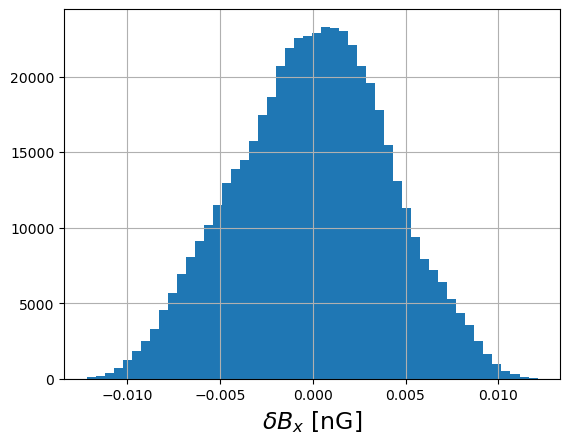

In [249]:
counts, bins = np.histogram(Bx.real, bins=50)
plt.hist(bins[:-1], bins, weights=counts)
plt.xlabel(r'$\delta B_x$ [nG]', fontsize=17)
plt.grid()

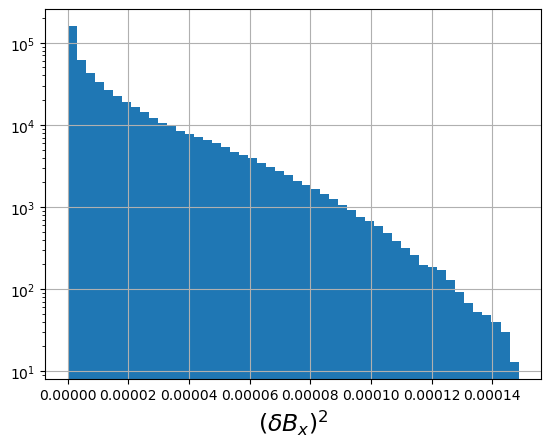

In [250]:
counts, bins = np.histogram(Bx.real**2, bins=50)
plt.hist(bins[:-1], bins, weights=counts)
plt.xlabel(r'$(\delta B_x)^2$', fontsize=17)
plt.yscale('log')
plt.grid()